## Introduction to Seaborn

Seaborn is a library for making attractive and informative statistical graphics in Python. It is built on top of matplotlib and tightly integrated with the PyData stack, including support for numpy and pandas data structures and statistical routines from scipy and statsmodels.

http://seaborn.pydata.org/introduction.html

https://seaborn.pydata.org/tutorial.html

In [33]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
import seaborn as sns
sns.set(color_codes=True)

#### Plotting univariate distributions
By default, this will draw a histogram and fit a kernel density estimate (KDE).

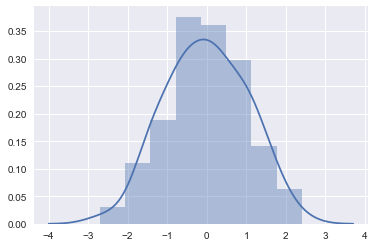

In [35]:
x = np.random.normal(size=100)
sns.distplot(x);

#### Plotting bivariate distributions
It can also be useful to visualize a bivariate distribution of two variables. The easiest way to do this in seaborn is to just use the jointplot() function, which creates a multi-panel figure that shows both the bivariate (or joint) relationship between two variables along with the univariate (or marginal) distribution of each on separate axes.

In [52]:
# Generate multivariate data
mean, cov = [0, 1], [(1, .5), (.5, 1)]
print(cov)

[(1, 0.5), (0.5, 1)]


In [53]:
data = np.random.multivariate_normal(mean, cov, 200)
np.shape(data)

(200, 2)

In [54]:
df = pd.DataFrame(data, columns=["x", "y"])
df.head()

,x,y
0,0.415050,0.264057
1,-0.031957,1.028701
2,-1.580146,1.113031
3,-0.000081,-0.655499
4,0.047414,1.433080


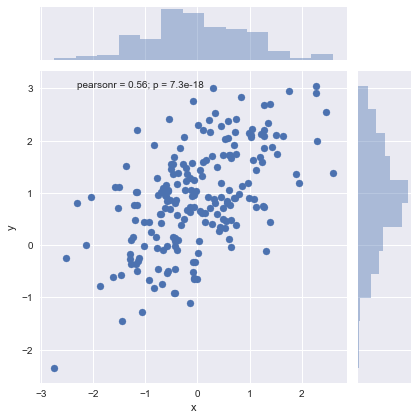

In [55]:
sns.jointplot(x="x", y="y", data=df);

#### Hexbin plots
The bivariate analogue of a histogram is known as a “hexbin” plot, because it shows the counts of observations that fall within hexagonal bins. 

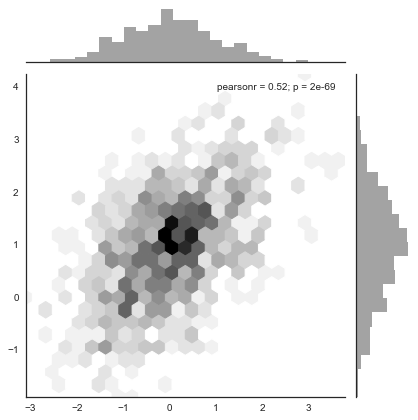

In [7]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");

#### Kernel density estimation
It is also posible to use the kernel density estimation procedure described above to visualize a bivariate distribution. In seaborn, this kind of plot is shown with a contour plot and is available as a style in jointplot():

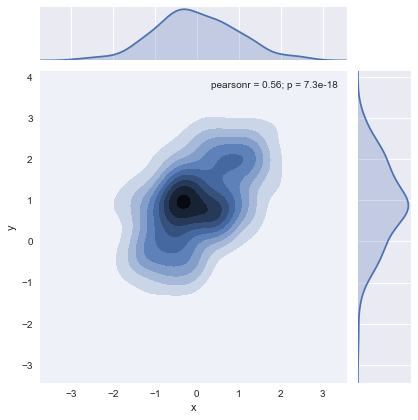

In [56]:
sns.jointplot(x="x", y="y", data=df, kind="kde")

#### Categorical scatterplots
tips = sns.load_dataset("tips")A simple way to show the the values of some quantitative variable across the levels of a categorical variable uses stripplot(), which generalizes a scatterplot to the case where one of the variables is categorical:

In [57]:
tips = sns.load_dataset("tips")

In [58]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


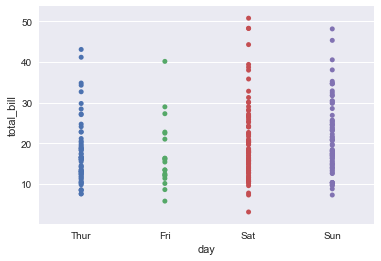

In [59]:
sns.stripplot(x="day", y="total_bill", data=tips);

In a strip plot, the scatterplot points will usually overlap. This makes it difficult to see the full distribution of data. One easy solution is to adjust the positions (only along the categorical axis) using some random “jitter”:

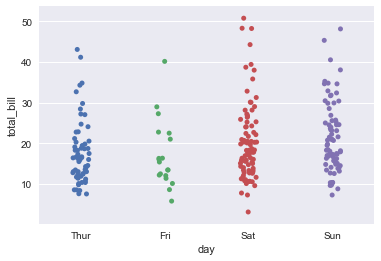

In [12]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True);

In [13]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Exercise: Create four random-jitter strip plots, one for each numerical column of iris dataset. Use species column for categorical data. For each plot comment on the standard deviation across different species.  

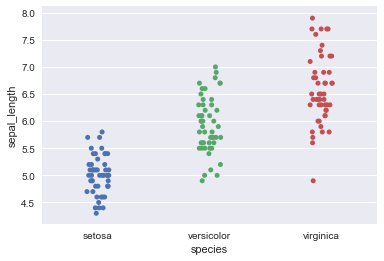

In [63]:
sns.stripplot(x="species", y="sepal_length", data=iris, jitter=True)#mean for virginica is higher

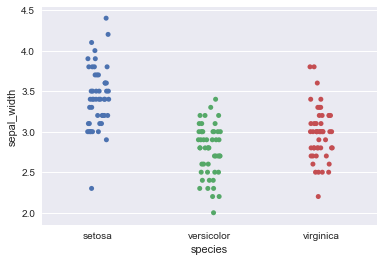

In [64]:
sns.stripplot(x="species", y="sepal_width", data=iris, jitter=True)#mean for setosa is higher

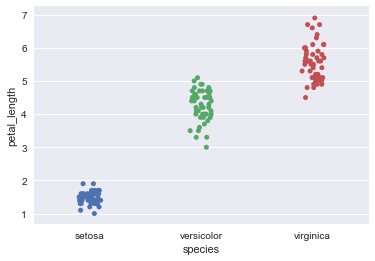

In [65]:
sns.stripplot(x="species", y="petal_length", data=iris, jitter=True)#mean for virginica is higher

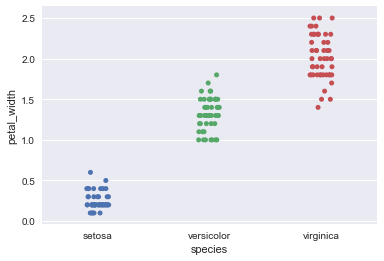

In [66]:
sns.stripplot(x="species", y="petal_width", data=iris, jitter=True)#mean for virginica is higher

#### Boxplots
This kind of plot shows the three quartile values of the distribution along with extreme values. The “whiskers” extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. 

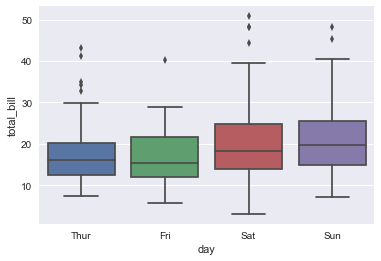

In [14]:
sns.boxplot(x="day", y="total_bill", data=tips);

Exercise: Values beyond whiskers can be considered as outliers. For the boxplot list all outliers for total_bill for day="Thur". You can use the total_bill value of 30 as the threshold.

In [76]:
tips[(tips.day=='Thur')&(tips.total_bill>30)]

,total_bill,tip,sex,smoker,day,time,size
83,32.68,5.00,Male,Yes,Thur,Lunch,2
85,34.83,5.17,Female,No,Thur,Lunch,4
141,34.30,6.70,Male,No,Thur,Lunch,6
142,41.19,5.00,Male,No,Thur,Lunch,5
197,43.11,5.00,Female,Yes,Thur,Lunch,4


Exercise: Using titanic dataset, create boxplot for age data for different values of pclass. Load the titalnic dataset and use the head() function to view different columns:

titanic = sns.load_dataset("titanic")

titanic.head()

What can you conclude from the plots?

In [80]:
titanic = sns.load_dataset("titanic")

titanic.head()
sns.boxplot(x="pclass", y="age", data=titanic);

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Exercise: For the previous boxplot exercise on titanic dataset add hue="sex". What can you conclude from the plot? List all outliers for age for pclass=3 and sex=male.

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
94,0,3,male,59.0,0,0,7.2500,S,Third,man,True,NaN,Southampton,no,True
116,0,3,male,70.5,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
152,0,3,male,55.5,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
280,0,3,male,65.0,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
326,0,3,male,61.0,0,0,6.2375,S,Third,man,True,NaN,Southampton,no,True
851,0,3,male,74.0,0,0,7.7750,S,Third,man,True,NaN,Southampton,no,True


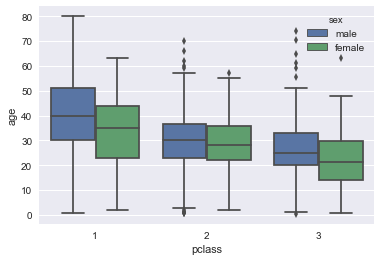

In [85]:
sns.boxplot(x="pclass", y="age", data=titanic,hue="sex");
titanic[(titanic.pclass==3)&(titanic.sex=="male")&(titanic.age>52)]

#### Violinplots
A different approach is a violinplot(), which combines a boxplot with the kernel density estimation :

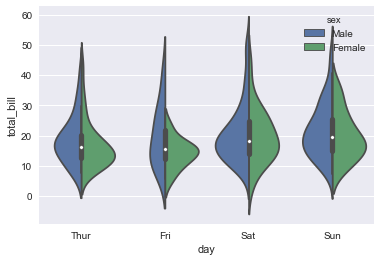

In [90]:
sns.violinplot(x="day", y="total_bill", data=tips,hue="sex", split=True);

Exercise: Create violin plot for the titanic dataset for the age data using differnt pclass values and hue="sex". Can you comment on the distribution parameters such as mean and standard deviation. 

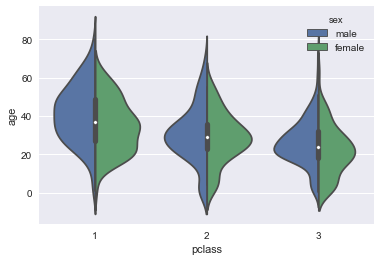

In [88]:
sns.violinplot(x="pclass", y="age", data=titanic,hue="sex", split=True);
#mean for male in class 1 is around age 40.

### Plot linear regression models

The lmplot function draws a scatterplot of two variables, x and y, and then fit the regression model y ~ x and plot the resulting regression line and a 95% confidence interval for that regression:

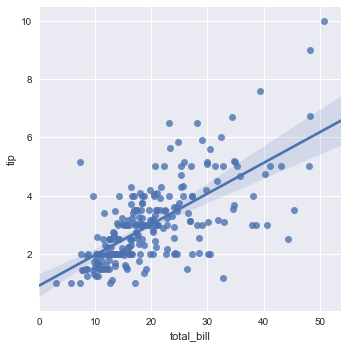

In [91]:
sns.lmplot(x="total_bill", y="tip", data=tips)

What if one of the variables has discrete values?

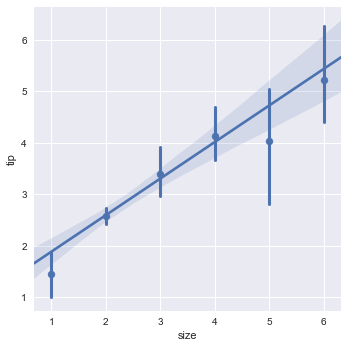

In [92]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean)

Exercise: Use lmplot() function to draw linear regression model for iris dataset with y=sepal_length and x=petal_width. Repeat the plot with y=sepal_width and x=petal_width. What can you conlude from the two plots?

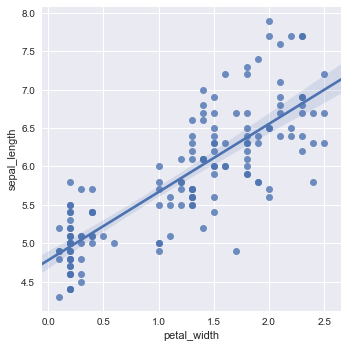

In [94]:
sns.lmplot(y="sepal_length", x="petal_width", data=iris)

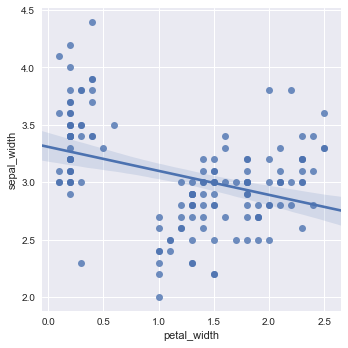

In [95]:
sns.lmplot(y="sepal_width", x="petal_width", data=iris)

#### Conditioning on other variables

How does the relationship between  two variables change as a function of a third variable (typical categorical)?

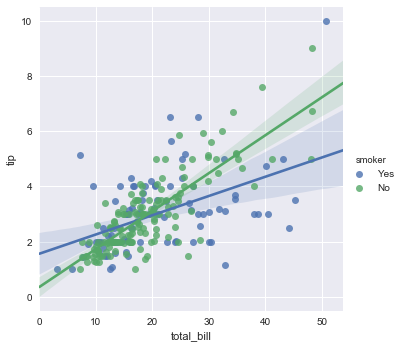

In [96]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips)

### Heatmap


In [97]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [20]:
flightsN = flights.pivot("month", "year", "passengers")
flightsN.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


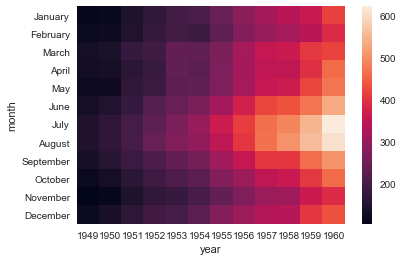

In [21]:
ax = sns.heatmap(flightsN)

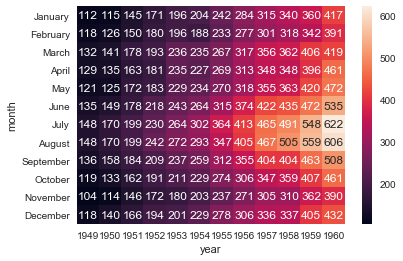

In [22]:
ax = sns.heatmap(flightsN, annot=True, fmt="d")

#### Facet Grid
For visualizing the distribution of a variable separately within subsets of a dataset. These subsets of data can be based on a categorical variable in the dataset.


In [98]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


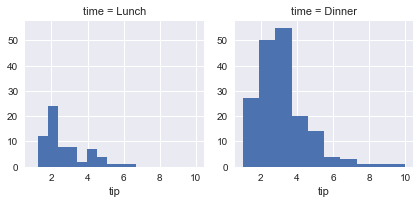

In [99]:
# identify the two subsets of data based on time: lunch and dinner and setup the grid
g = sns.FacetGrid(tips, col="time")
# visualize data on the grid: distribution of tips in the two subsets
g.map(plt.hist, "tip")

In [25]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Exercise: Use FacetGrid function to plot histogram for iris dataset for sepal_length for different species.

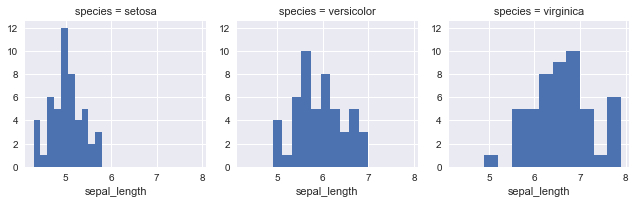

In [103]:
g = sns.FacetGrid(iris, col="species")
g.map(plt.hist, "sepal_length")

Add one more dimension using hue

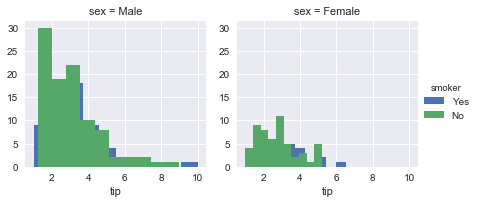

In [26]:
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(plt.hist, "tip")
g.add_legend()

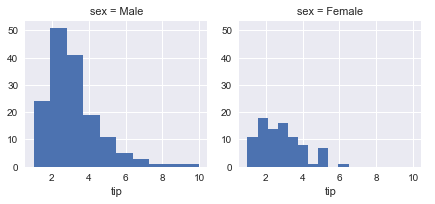

In [104]:
g = sns.FacetGrid(tips, col="sex")
g.map(plt.hist, "tip")
g.add_legend()

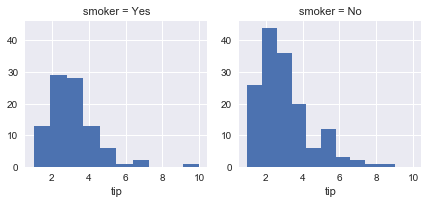

In [28]:
g = sns.FacetGrid(tips, col="smoker")
g.map(plt.hist, "tip")
g.add_legend()

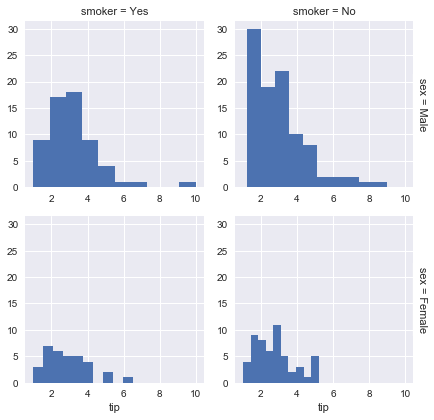

In [106]:
# Using one grid
#g = sns.FacetGrid(tips, row = "sex", col="smoker")
g = sns.FacetGrid(tips, row = "sex", col="smoker", margin_titles=True)
g.map(plt.hist, "tip")

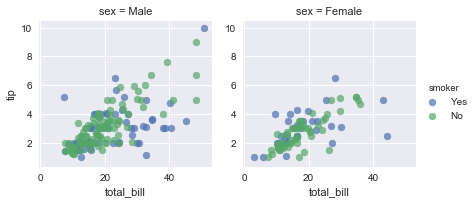

In [107]:
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(plt.scatter, "total_bill", "tip", alpha=.7)
g.add_legend()

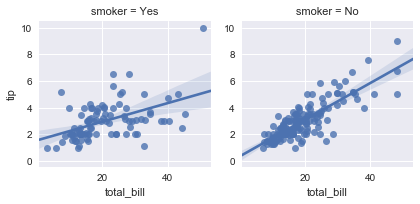

In [111]:
g = sns.FacetGrid(tips, col="smoker")
g.map(sns.regplot, "total_bill", "tip")

#g = sns.FacetGrid(tips, row="smoker", col="time", margin_titles=True)
#g.map(sns.regplot, "size", "total_bill", color=".3", fit_reg=False, x_jitter=.1);

Exercise(take home):  Use  FacetGrid function to plot linear regression model for petal_width (y) and sepal_length (x) for different species.

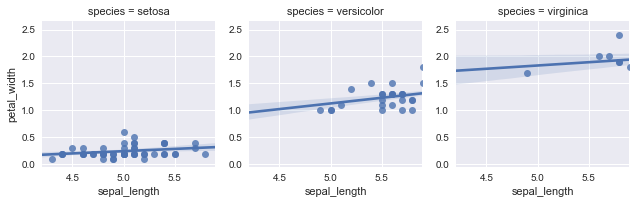

In [113]:
r = sns.FacetGrid(iris, col="species")
r.map(sns.regplot, "sepal_length", "petal_width")

In [112]:
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


#### Visualizing pairwise relationships in a dataset
To plot multiple pairwise bivariate distributions in a dataset, you can use the pairplot() function. This creates a matrix of axes and shows the relationship for each pair of columns in a DataFrame. by default, it also draws the univariate distribution of each variable on the diagonal Axes:

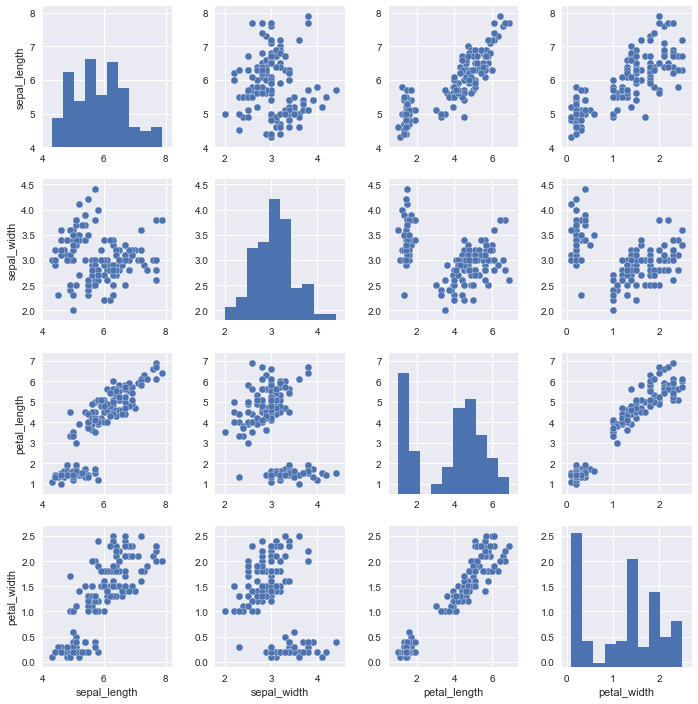

In [110]:
sns.pairplot(iris)